In [1]:
library(readr)
library(dplyr)
library(arules)
library(arulesViz)
library(tidyr)
library(methods)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘arules’

The following object is masked from ‘package:dplyr’:

    recode

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid

Attaching package: ‘tidyr’

The following object is masked from ‘package:Matrix’:

    expand



In [2]:
#list.files("../input/order_products__train.csv")
#list.files("../input/aisles.csv")
#list.files("../input/departments.csv")
list.files("../input/order_products__prior.csv")
#list.files("../input/orders.csv")
list.files("../input/products.csv")
#order_products_train<-read.csv("../input/order_products__train.csv")
#aisles<-read.csv("../input/aisles.csv")
#departments<-read.csv("../input/departments.csv")
#orders<-read.csv("../input/orders.csv")

character(0)

character(0)

In [3]:
orderprior<-read.csv("../input/order_products__prior.csv")
products<-read.csv("../input/products.csv")

#shopping baskets

In [4]:
order_baskets <- orderprior %>% 
  inner_join(products, by="product_id") %>% 
  group_by(order_id) %>%
  summarise(basket = as.vector(list(product_id)))


#transactions

In [5]:
transactions <- as(order_baskets$basket, "transactions")

In [6]:
freq<-itemFrequency(transactions, type="relative")
freq<-sort(freq, decreasing = T)
freq[1:10]

24852      13176      21137      21903      47209      47766      47626 
0.14699332 0.11802951 0.08233075 0.07525054 0.06643620 0.05499905 0.04748460 
     16797      26209      27845 
0.04446551 0.04374262 0.04289593

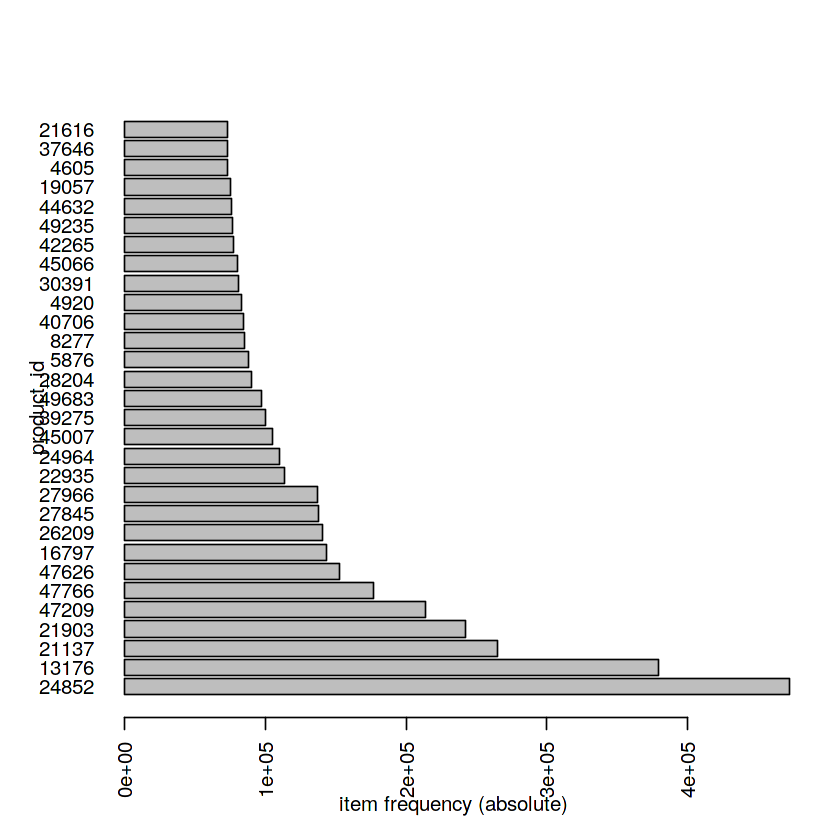

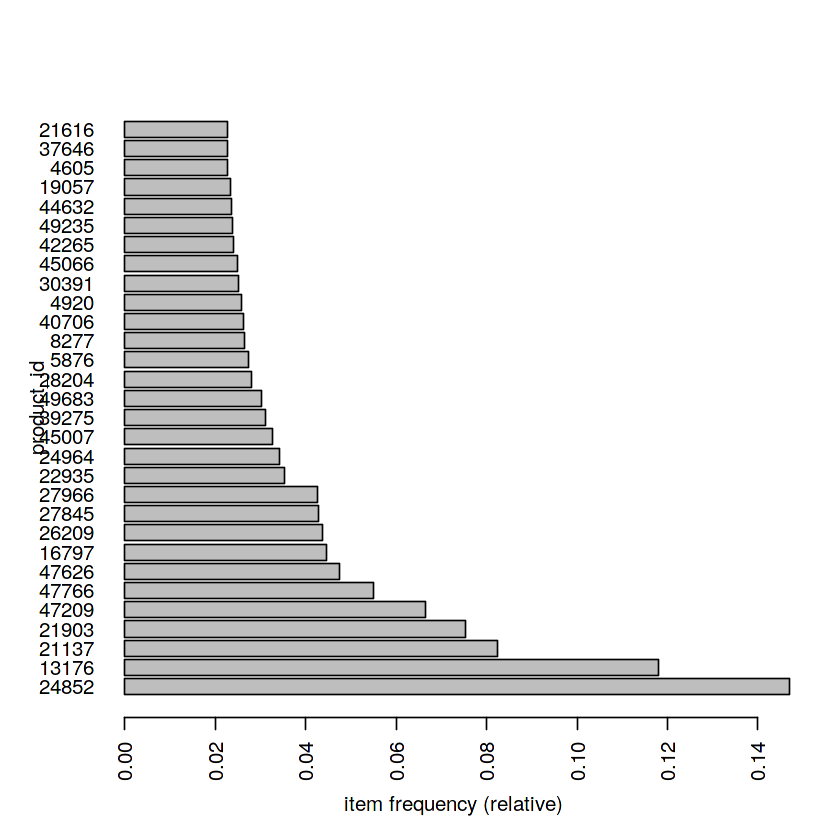

In [7]:
itemFrequencyPlot(transactions,topN="30" ,type="absolute", horiz=TRUE, ylab="product_id")
itemFrequencyPlot(transactions,topN="30" ,type="relative", horiz=TRUE, ylab="product_id")

##Apriori search for itemset and item rules

In [8]:
itemset<- apriori(transactions, parameter=list(supp=0.001, conf=0.8, target="frequent"))
length(itemset)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3214 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[49677 item(s), 3214874 transaction(s)] done [11.71s].
sorting and recoding items ... [1772 item(s)] done [0.47s].
creating transaction tree ... done [6.58s].
checking subsets of size 1 2 3 4 done [1.54s].
writing ... [3883 set(s)] done [0.00s].
creating S4 object  ... done [2.43s].


[1] 3883

In [9]:
inspect(sort(itemset[1:10], decreasing=T))

     items   support    
[1]  {11365} 0.001349042
[2]  {17207} 0.001290253
[3]  {130}   0.001201913
[4]  {13914} 0.001195070
[5]  {12078} 0.001177340
[6]  {36472} 0.001118551
[7]  {33081} 0.001093978
[8]  {28413} 0.001093355
[9]  {19887} 0.001049497
[10] {48142} 0.001019947


In [10]:
itemrules<-apriori(transactions, parameter=list(supp=0.001, conf=0.1, target="rules"))
length(itemrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3214 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[49677 item(s), 3214874 transaction(s)] done [13.35s].
sorting and recoding items ... [1772 item(s)] done [0.51s].
creating transaction tree ... done [5.94s].
checking subsets of size 1 2 3 4 done [1.48s].
writing ... [1817 rule(s)] done [0.01s].
creating S4 object  ... done [2.10s].


[1] 1817

In [11]:
inspect(sort(itemrules[1:10], decreasing=T))
summary(itemrules)

     lhs        rhs     support     confidence lift    
[1]  {}      => {24852} 0.146993319 0.1469933   1.00000
[2]  {}      => {13176} 0.118029509 0.1180295   1.00000
[3]  {13575} => {6184}  0.001247016 0.3188072  33.23039
[4]  {6184}  => {13575} 0.001247016 0.1299809  33.23039
[5]  {46149} => {196}   0.001234885 0.4638934  41.66855
[6]  {196}   => {46149} 0.001234885 0.1109217  41.66855
[7]  {13263} => {28465} 0.001220888 0.4531286  75.64789
[8]  {36316} => {47977} 0.001037366 0.3512005  75.63407
[9]  {47977} => {36316} 0.001037366 0.2234057  75.63407
[10] {8048}  => {12341} 0.001018391 0.2451516  15.69327


set of 1817 rules

rule length distribution (lhs + rhs):sizes
   1    2    3    4 
   2 1260  547    8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.309   3.000   4.000 

summary of quality measures:
    support           confidence          lift        
 Min.   :0.001000   Min.   :0.1001   Min.   : 0.6889  
 1st Qu.:0.001175   1st Qu.:0.1369   1st Qu.: 1.7837  
 Median :0.001512   Median :0.1818   Median : 2.4143  
 Mean   :0.002319   Mean   :0.1971   Mean   : 4.0364  
 3rd Qu.:0.002355   3rd Qu.:0.2376   3rd Qu.: 3.2467  
 Max.   :0.146993   Max.   :0.5942   Max.   :75.6479  

mining info:
         data ntransactions support confidence
 transactions       3214874   0.001        0.1

In [12]:
supp<-sort(itemrules, by="support", decreasing=TRUE)
inspect(supp[1:10])

     lhs        rhs     support    confidence lift    
[1]  {}      => {24852} 0.14699332 0.1469933  1.000000
[2]  {}      => {13176} 0.11802951 0.1180295  1.000000
[3]  {47209} => {13176} 0.01939143 0.2918805  2.472945
[4]  {13176} => {47209} 0.01939143 0.1642931  2.472945
[5]  {21137} => {13176} 0.01916965 0.2328370  1.972702
[6]  {13176} => {21137} 0.01916965 0.1624140  1.972702
[7]  {21137} => {24852} 0.01746756 0.2121632  1.443353
[8]  {24852} => {21137} 0.01746756 0.1188323  1.443353
[9]  {47766} => {24852} 0.01660874 0.3019823  2.054395
[10] {24852} => {47766} 0.01660874 0.1129897  2.054395


In [13]:
conf<-sort(itemrules, by="confidence", decreasing=TRUE)
inspect(conf[1:10])

     lhs                    rhs     support     confidence lift     
[1]  {4957,33787}        => {33754} 0.001161165 0.5942375  63.907895
[2]  {21709,35221}       => {44632} 0.001379214 0.5188392  21.980375
[3]  {16797,45066}       => {24852} 0.001149967 0.4905786   3.337421
[4]  {16797,28204}       => {24852} 0.001141258 0.4901804   3.334712
[5]  {21137,27966,47209} => {13176} 0.001190715 0.4850482   4.109550
[6]  {21709,44632}       => {35221} 0.001379214 0.4807025  33.201521
[7]  {33754,33787}       => {4957}  0.001161165 0.4658098  72.141821
[8]  {46149}             => {196}   0.001234885 0.4638934  41.668546
[9]  {8174,47209}        => {13176} 0.001175474 0.4635672   3.927554
[10] {28204,49683}       => {24852} 0.001024924 0.4625860   3.146986


In [14]:
li<-sort(itemrules, by="lift", decreasing=TRUE)
inspect(li[1:10])

     lhs              rhs     support     confidence lift    
[1]  {28465}       => {13263} 0.001220888 0.2038220  75.64789
[2]  {13263}       => {28465} 0.001220888 0.4531286  75.64789
[3]  {36316}       => {47977} 0.001037366 0.3512005  75.63407
[4]  {47977}       => {36316} 0.001037366 0.2234057  75.63407
[5]  {28465}       => {36865} 0.002247055 0.3751363  73.64084
[6]  {36865}       => {28465} 0.002247055 0.4411064  73.64084
[7]  {33754,33787} => {4957}  0.001161165 0.4658098  72.14182
[8]  {28465}       => {8309}  0.001418096 0.2367451  71.37819
[9]  {8309}        => {28465} 0.001418096 0.4275532  71.37819
[10] {36865}       => {8309}  0.001188538 0.2333150  70.34403


##Product Combinations
* rhsrules-> what is the second product, when the first is 24852
* hsrules-> what is the first product, when the second is 24852

In [15]:
rhsrules<- apriori(data=transactions,parameter=list(supp=0.01, conf=0.10), 
                   appearance=list(default="rhs",lhs="24852"),control=list(verbose=F))
rhsrules<-sort(rhsrules, decreasing=T, by="confidence")
inspect(rhsrules[1:2])

    lhs        rhs     support    confidence lift    
[1] {24852} => {21137} 0.01746756 0.1188323  1.443353
[2] {}      => {13176} 0.11802951 0.1180295  1.000000


In [16]:
lhsrules<- apriori(data=transactions,parameter=list(supp=0.01, conf=0.10), 
                   appearance=list(default="lhs",rhs="24852"),control=list(verbose=F))
rhsrules<-sort(lhsrules, decreasing=T, by="confidence")
inspect(lhsrules[1:5])

    lhs        rhs     support    confidence lift    
[1] {}      => {24852} 0.14699332 0.1469933  1.000000
[2] {28204} => {24852} 0.01055811 0.3786929  2.576259
[3] {16797} => {24852} 0.01282539 0.2884345  1.962229
[4] {47626} => {24852} 0.01271589 0.2677899  1.821783
[5] {47766} => {24852} 0.01660874 0.3019823  2.054395


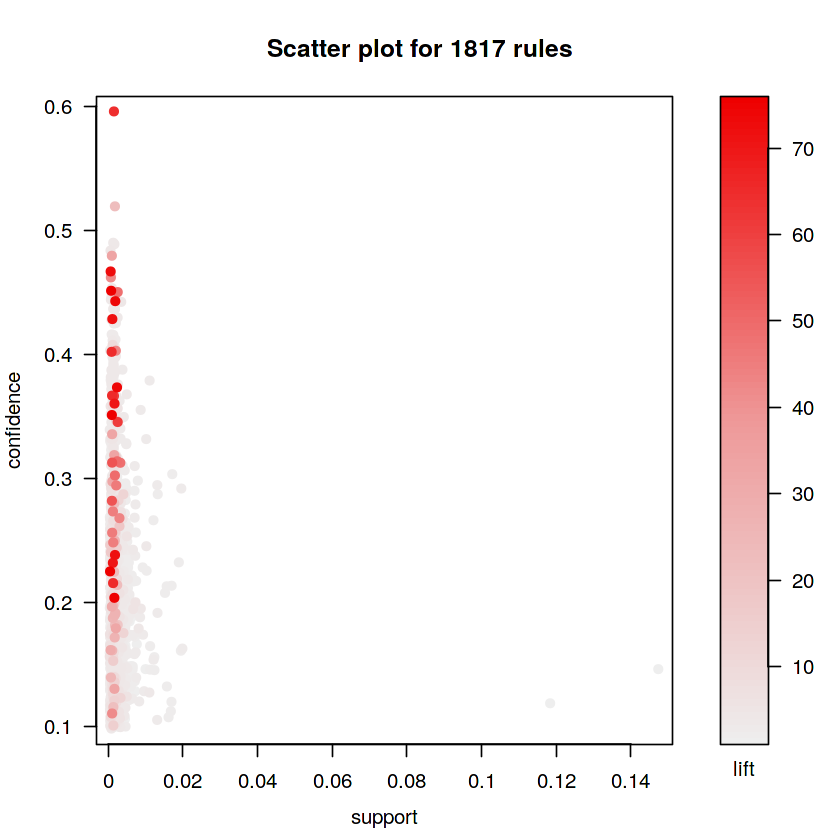

In [17]:
plot(itemrules)

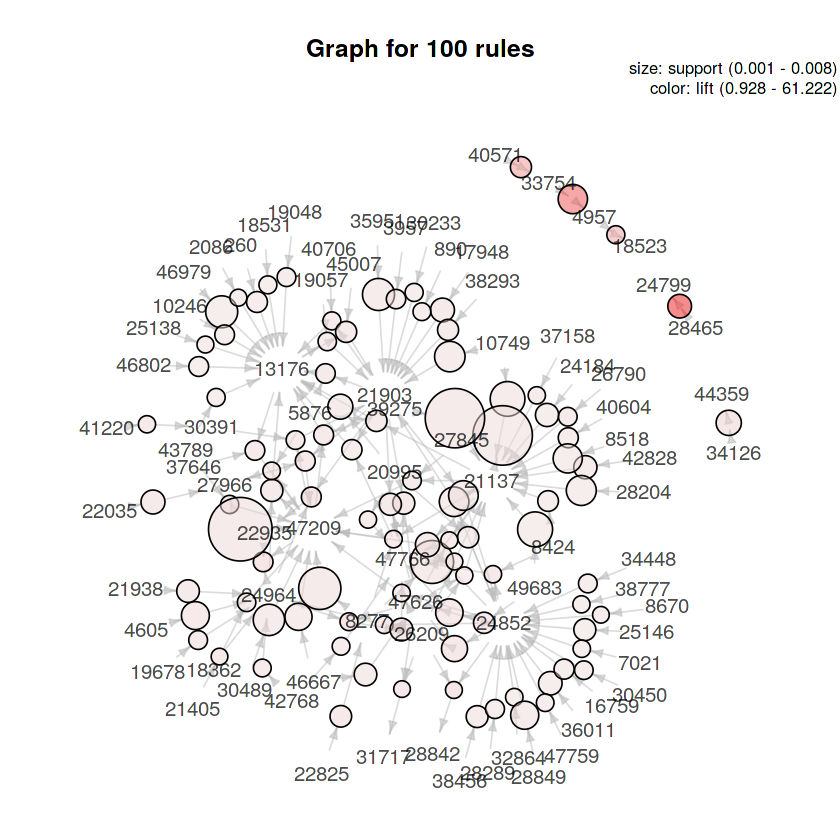

In [18]:
subitemrules100<- sample(itemrules, 100)
plot(subitemrules100, method="graph", control=list(type="items"),)

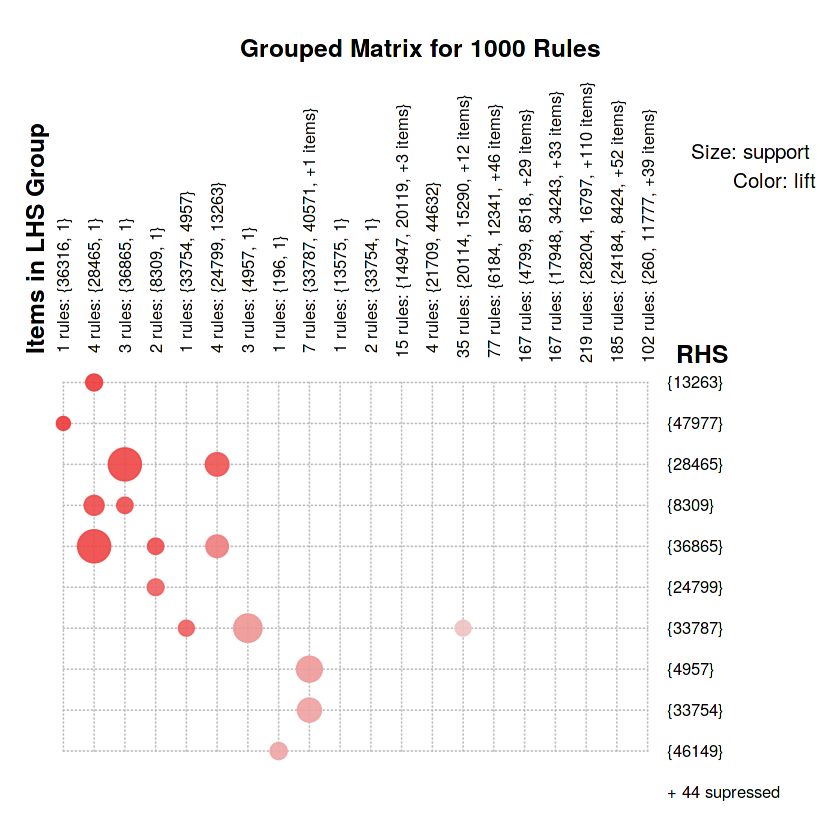

In [19]:
subitemrules1000<- sample(itemrules, 1000)
plot(subitemrules1000, method="grouped")

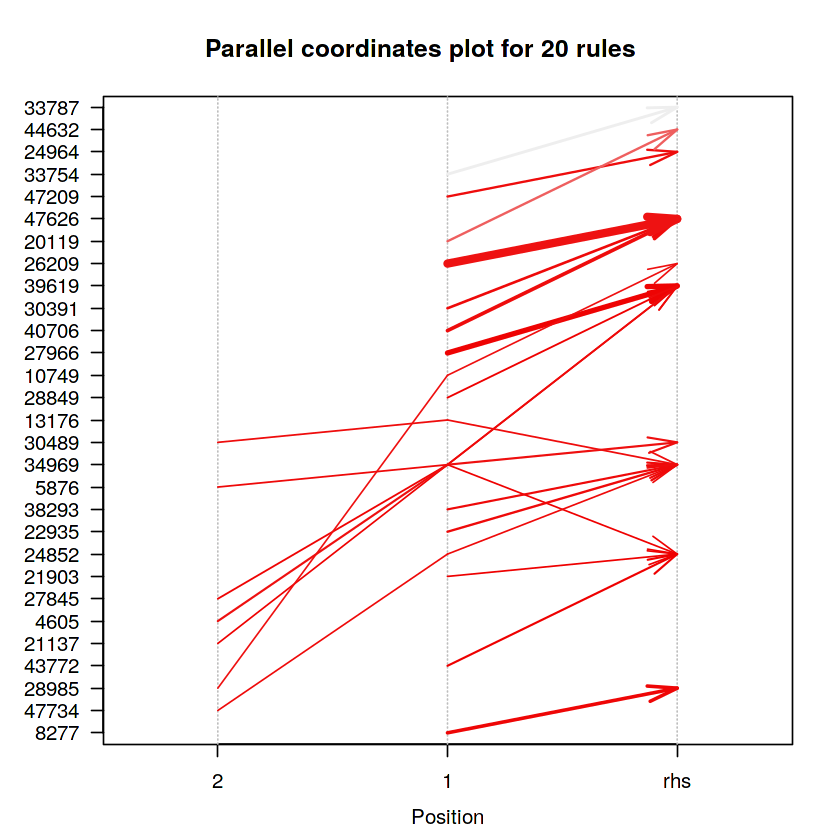

In [20]:
subitemrules20<- sample(itemrules, 20)
plot(subitemrules20, method="paracoord", control=list(reorder=(TRUE)))